In [16]:
# import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


## Data collection and Precprocessing

In [17]:
#load dataset using pandas
car = pd.read_csv('datasets/car data.csv')

In [18]:
#first five rows of dataset
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
#last five rows of dataset
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [20]:
# shape of dataset
car.shape

(301, 9)

In [21]:
# information about dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
# checking the number of missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [23]:
# checking the distribution of categorical dataset
car['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [24]:
car['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [25]:
car['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

## encoding the categorical data

In [26]:
# we have to replace string to int for ml prediction


In [27]:
car['Fuel_Type']=car['Fuel_Type'].replace(['Petrol','Diesel','CNG'],[0,1,2])
car['Seller_Type']=car['Seller_Type'].replace(['Dealer','Individual'],[0,1])
car['Transmission']=car['Transmission'].replace(['Manual','Automatic'],[0,1])

In [28]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

## Splitting the dataset into training dataset and testing dataset

In [29]:
# split feature matrix and target vector
X = car.drop(['Car_Name','Selling_Price'], axis=1)
y = car['Selling_Price']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [31]:
# let's check the shape
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


# Model Training
## 1. Linear Regression

In [32]:
# load the model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [33]:
X_train_prediction = linreg.predict(X_train)

In [35]:
# R square Error
training_error_acc = metrics.r2_score(y_train,X_train_prediction)
print(training_error_acc)

0.8799451660493698


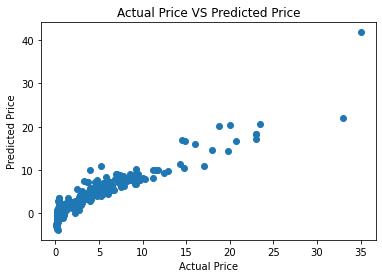

In [37]:
## visualize the actual prices and predicted prices
plt.scatter(y_train, X_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [36]:
X_test_prediction = linreg.predict(X_test)
testing_error_acc = metrics.r2_score(X_test_prediction,y_test)
print(testing_error_acc)

0.8062199941176265


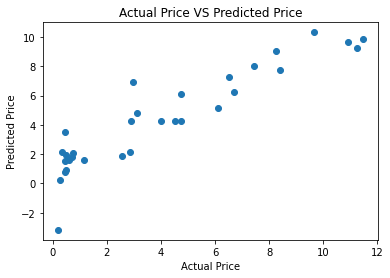

In [38]:
## visualize the actual prices and predicted prices
plt.scatter(y_test, X_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

## 2. Lasso Regression

In [39]:
# load the model
lasreg = Lasso()
lasreg.fit(X_train,y_train)

Lasso()

In [41]:
# R square Error
X_train_prediction = lasreg.predict(X_train)
training_error_acc = metrics.r2_score(y_train,X_train_prediction)
print(training_error_acc)

0.8427856123435794


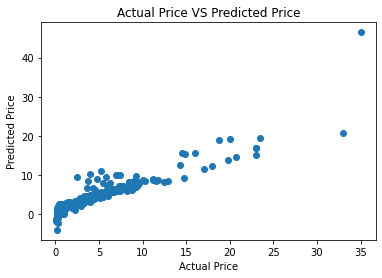

In [42]:
## visualize the actual prices and predicted prices
plt.scatter(y_train, X_train_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [43]:
X_test_prediction = lasreg.predict(X_test)
testing_error_acc = metrics.r2_score(X_test_prediction,y_test)
print(testing_error_acc)

0.7711110403265475


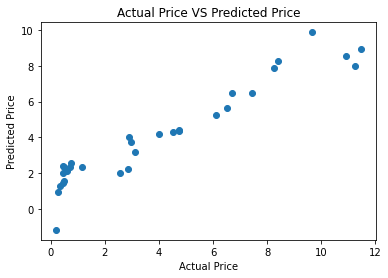

In [44]:
## visualize the actual prices and predicted prices
plt.scatter(y_test, X_test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()